## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  45.613117   931.239929  0.768050   6.897076  1.383641
1  64.297345   887.684936  0.414960   3.030828  1.398912
2  40.745302   292.897950  0.900905  10.483477  1.143870
3  91.060303  1046.151732  0.002180   9.973008  0.131066
4  94.632819   733.346647  0.571400   2.104165  1.229344


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.14666 | train_mse: 5.39252 | train_mae: 1.66323 |  0:00:00s
epoch 1  | loss: 0.97854 | train_mse: 4.025   | train_mae: 1.44623 |  0:00:00s


epoch 2  | loss: 0.81036 | train_mse: 3.16037 | train_mae: 1.32641 |  0:00:01s
epoch 3  | loss: 0.92247 | train_mse: 2.34545 | train_mae: 1.14496 |  0:00:01s
epoch 4  | loss: 0.78024 | train_mse: 1.98347 | train_mae: 1.06169 |  0:00:01s


epoch 5  | loss: 0.87081 | train_mse: 1.61892 | train_mae: 0.93462 |  0:00:01s
epoch 6  | loss: 0.70886 | train_mse: 1.43874 | train_mae: 0.88516 |  0:00:01s
epoch 7  | loss: 0.76897 | train_mse: 1.30878 | train_mae: 0.84045 |  0:00:01s


epoch 8  | loss: 0.6729  | train_mse: 1.20502 | train_mae: 0.79547 |  0:00:01s
epoch 9  | loss: 0.69203 | train_mse: 1.13774 | train_mae: 0.77533 |  0:00:01s


epoch 10 | loss: 0.57227 | train_mse: 1.0785  | train_mae: 0.74773 |  0:00:01s
epoch 11 | loss: 0.57003 | train_mse: 1.01649 | train_mae: 0.72476 |  0:00:01s
epoch 12 | loss: 0.49162 | train_mse: 0.94427 | train_mae: 0.69597 |  0:00:02s


epoch 13 | loss: 0.65945 | train_mse: 0.8899  | train_mae: 0.66684 |  0:00:02s
epoch 14 | loss: 0.3514  | train_mse: 0.8535  | train_mae: 0.64651 |  0:00:02s
epoch 15 | loss: 0.58876 | train_mse: 0.8069  | train_mae: 0.62988 |  0:00:02s


epoch 16 | loss: 0.51709 | train_mse: 0.74592 | train_mae: 0.60636 |  0:00:02s
epoch 17 | loss: 0.47044 | train_mse: 0.69647 | train_mae: 0.58566 |  0:00:02s
epoch 18 | loss: 0.57051 | train_mse: 0.66301 | train_mae: 0.57506 |  0:00:02s


epoch 19 | loss: 0.58359 | train_mse: 0.62646 | train_mae: 0.55842 |  0:00:02s
epoch 20 | loss: 0.53222 | train_mse: 0.59817 | train_mae: 0.54489 |  0:00:02s


epoch 21 | loss: 0.45354 | train_mse: 0.58248 | train_mae: 0.53447 |  0:00:02s
epoch 22 | loss: 0.4126  | train_mse: 0.57134 | train_mae: 0.52528 |  0:00:03s
epoch 23 | loss: 0.43312 | train_mse: 0.55673 | train_mae: 0.51398 |  0:00:03s


epoch 24 | loss: 0.39966 | train_mse: 0.54212 | train_mae: 0.50469 |  0:00:03s
epoch 25 | loss: 0.36965 | train_mse: 0.53871 | train_mae: 0.49905 |  0:00:03s
epoch 26 | loss: 0.4364  | train_mse: 0.52884 | train_mae: 0.49464 |  0:00:03s


epoch 27 | loss: 0.35239 | train_mse: 0.516   | train_mae: 0.48761 |  0:00:03s
epoch 28 | loss: 0.50288 | train_mse: 0.49584 | train_mae: 0.47978 |  0:00:03s
epoch 29 | loss: 0.35588 | train_mse: 0.47963 | train_mae: 0.47056 |  0:00:03s


epoch 30 | loss: 0.42188 | train_mse: 0.45975 | train_mae: 0.46098 |  0:00:03s
epoch 31 | loss: 0.43843 | train_mse: 0.43274 | train_mae: 0.44854 |  0:00:03s


epoch 32 | loss: 0.51744 | train_mse: 0.41201 | train_mae: 0.43721 |  0:00:04s
epoch 33 | loss: 0.34874 | train_mse: 0.40066 | train_mae: 0.43272 |  0:00:04s
epoch 34 | loss: 0.43936 | train_mse: 0.39541 | train_mae: 0.43345 |  0:00:04s


epoch 35 | loss: 0.42756 | train_mse: 0.38838 | train_mae: 0.43148 |  0:00:04s
epoch 36 | loss: 0.40602 | train_mse: 0.377   | train_mae: 0.42542 |  0:00:04s
epoch 37 | loss: 0.3975  | train_mse: 0.36717 | train_mae: 0.42049 |  0:00:04s


epoch 38 | loss: 0.30243 | train_mse: 0.35704 | train_mae: 0.41661 |  0:00:04s
epoch 39 | loss: 0.36997 | train_mse: 0.34312 | train_mae: 0.40571 |  0:00:04s


epoch 40 | loss: 0.28762 | train_mse: 0.33635 | train_mae: 0.40077 |  0:00:04s
epoch 41 | loss: 0.28186 | train_mse: 0.32553 | train_mae: 0.39383 |  0:00:04s


epoch 42 | loss: 0.3478  | train_mse: 0.31688 | train_mae: 0.38992 |  0:00:05s
epoch 43 | loss: 0.5484  | train_mse: 0.31067 | train_mae: 0.38942 |  0:00:05s
epoch 44 | loss: 0.32944 | train_mse: 0.30896 | train_mae: 0.38757 |  0:00:05s


epoch 45 | loss: 0.42275 | train_mse: 0.29984 | train_mae: 0.38377 |  0:00:05s
epoch 46 | loss: 0.31862 | train_mse: 0.29341 | train_mae: 0.37995 |  0:00:05s
epoch 47 | loss: 0.33435 | train_mse: 0.29219 | train_mae: 0.38144 |  0:00:05s


epoch 48 | loss: 0.33871 | train_mse: 0.2839  | train_mae: 0.38092 |  0:00:05s
epoch 49 | loss: 0.33966 | train_mse: 0.26896 | train_mae: 0.3729  |  0:00:05s
epoch 50 | loss: 0.35909 | train_mse: 0.25354 | train_mae: 0.3635  |  0:00:05s


epoch 51 | loss: 0.30256 | train_mse: 0.24234 | train_mae: 0.35296 |  0:00:05s
epoch 52 | loss: 0.28613 | train_mse: 0.23245 | train_mae: 0.33856 |  0:00:05s


epoch 53 | loss: 0.2695  | train_mse: 0.23417 | train_mae: 0.3385  |  0:00:06s
epoch 54 | loss: 0.26263 | train_mse: 0.23275 | train_mae: 0.32984 |  0:00:06s
epoch 55 | loss: 0.38422 | train_mse: 0.23325 | train_mae: 0.32965 |  0:00:06s


epoch 56 | loss: 0.3248  | train_mse: 0.23566 | train_mae: 0.33226 |  0:00:06s
epoch 57 | loss: 0.31701 | train_mse: 0.24264 | train_mae: 0.33763 |  0:00:06s
epoch 58 | loss: 0.36464 | train_mse: 0.25038 | train_mae: 0.34364 |  0:00:06s


epoch 59 | loss: 0.23987 | train_mse: 0.25314 | train_mae: 0.34861 |  0:00:06s
epoch 60 | loss: 0.52657 | train_mse: 0.24007 | train_mae: 0.34268 |  0:00:06s
epoch 61 | loss: 0.25761 | train_mse: 0.22497 | train_mae: 0.33648 |  0:00:06s


epoch 62 | loss: 0.2784  | train_mse: 0.19811 | train_mae: 0.32494 |  0:00:06s
epoch 63 | loss: 0.33702 | train_mse: 0.1858  | train_mae: 0.31815 |  0:00:07s
epoch 64 | loss: 0.31933 | train_mse: 0.17814 | train_mae: 0.30767 |  0:00:07s


epoch 65 | loss: 0.4762  | train_mse: 0.17633 | train_mae: 0.30859 |  0:00:07s
epoch 66 | loss: 0.31415 | train_mse: 0.16975 | train_mae: 0.30292 |  0:00:07s
epoch 67 | loss: 0.22699 | train_mse: 0.16417 | train_mae: 0.299   |  0:00:07s


epoch 68 | loss: 0.25004 | train_mse: 0.15797 | train_mae: 0.29308 |  0:00:07s
epoch 69 | loss: 0.18322 | train_mse: 0.15172 | train_mae: 0.29016 |  0:00:07s
epoch 70 | loss: 0.24528 | train_mse: 0.14599 | train_mae: 0.28551 |  0:00:07s


epoch 71 | loss: 0.22624 | train_mse: 0.13908 | train_mae: 0.28138 |  0:00:07s
epoch 72 | loss: 0.19644 | train_mse: 0.13376 | train_mae: 0.27556 |  0:00:07s


epoch 73 | loss: 0.28312 | train_mse: 0.12887 | train_mae: 0.27273 |  0:00:07s
epoch 74 | loss: 0.20026 | train_mse: 0.11901 | train_mae: 0.26432 |  0:00:08s
epoch 75 | loss: 0.35507 | train_mse: 0.11703 | train_mae: 0.26328 |  0:00:08s


epoch 76 | loss: 0.40216 | train_mse: 0.11653 | train_mae: 0.2631  |  0:00:08s
epoch 77 | loss: 0.38293 | train_mse: 0.11743 | train_mae: 0.26193 |  0:00:08s
epoch 78 | loss: 0.21456 | train_mse: 0.11744 | train_mae: 0.26063 |  0:00:08s


epoch 79 | loss: 0.25022 | train_mse: 0.12252 | train_mae: 0.26438 |  0:00:08s
epoch 80 | loss: 0.29666 | train_mse: 0.12363 | train_mae: 0.26538 |  0:00:08s
epoch 81 | loss: 0.21127 | train_mse: 0.12428 | train_mae: 0.26573 |  0:00:08s


epoch 82 | loss: 0.26403 | train_mse: 0.1252  | train_mae: 0.26586 |  0:00:08s
epoch 83 | loss: 0.33181 | train_mse: 0.12332 | train_mae: 0.26528 |  0:00:08s
epoch 84 | loss: 0.37138 | train_mse: 0.11909 | train_mae: 0.25983 |  0:00:09s


epoch 85 | loss: 0.44045 | train_mse: 0.12499 | train_mae: 0.26606 |  0:00:09s
epoch 86 | loss: 0.17337 | train_mse: 0.13136 | train_mae: 0.26962 |  0:00:09s
epoch 87 | loss: 0.15656 | train_mse: 0.12752 | train_mae: 0.26625 |  0:00:09s


epoch 88 | loss: 0.26802 | train_mse: 0.12472 | train_mae: 0.26439 |  0:00:09s
epoch 89 | loss: 0.25914 | train_mse: 0.12038 | train_mae: 0.26043 |  0:00:09s
epoch 90 | loss: 0.25529 | train_mse: 0.11862 | train_mae: 0.25918 |  0:00:09s


epoch 91 | loss: 0.28945 | train_mse: 0.11769 | train_mae: 0.25715 |  0:00:09s
epoch 92 | loss: 0.13641 | train_mse: 0.12027 | train_mae: 0.25783 |  0:00:09s


epoch 93 | loss: 0.18625 | train_mse: 0.11798 | train_mae: 0.25829 |  0:00:09s
epoch 94 | loss: 0.1335  | train_mse: 0.11702 | train_mae: 0.25969 |  0:00:10s


epoch 95 | loss: 0.18088 | train_mse: 0.11521 | train_mae: 0.25808 |  0:00:10s
epoch 96 | loss: 0.26034 | train_mse: 0.11327 | train_mae: 0.25495 |  0:00:10s
epoch 97 | loss: 0.28713 | train_mse: 0.10911 | train_mae: 0.25031 |  0:00:10s


epoch 98 | loss: 0.19166 | train_mse: 0.10593 | train_mae: 0.24891 |  0:00:10s
epoch 99 | loss: 0.2357  | train_mse: 0.10344 | train_mae: 0.24851 |  0:00:10s


epoch 100| loss: 0.1235  | train_mse: 0.10212 | train_mae: 0.24817 |  0:00:10s
epoch 101| loss: 0.28853 | train_mse: 0.10266 | train_mae: 0.24936 |  0:00:10s


epoch 102| loss: 0.15171 | train_mse: 0.10246 | train_mae: 0.24819 |  0:00:10s
epoch 103| loss: 0.19825 | train_mse: 0.10022 | train_mae: 0.24624 |  0:00:10s


epoch 104| loss: 0.13994 | train_mse: 0.09724 | train_mae: 0.24213 |  0:00:11s
epoch 105| loss: 0.1669  | train_mse: 0.09263 | train_mae: 0.23524 |  0:00:11s
epoch 106| loss: 0.12133 | train_mse: 0.0911  | train_mae: 0.23211 |  0:00:11s


epoch 107| loss: 0.20466 | train_mse: 0.09039 | train_mae: 0.23171 |  0:00:11s
epoch 108| loss: 0.36036 | train_mse: 0.09055 | train_mae: 0.23299 |  0:00:11s
epoch 109| loss: 0.16413 | train_mse: 0.08747 | train_mae: 0.22866 |  0:00:11s


epoch 110| loss: 0.15667 | train_mse: 0.08709 | train_mae: 0.2266  |  0:00:11s
epoch 111| loss: 0.12757 | train_mse: 0.08974 | train_mae: 0.23299 |  0:00:11s


epoch 112| loss: 0.40753 | train_mse: 0.09074 | train_mae: 0.23487 |  0:00:11s
epoch 113| loss: 0.20875 | train_mse: 0.08991 | train_mae: 0.23397 |  0:00:11s


epoch 114| loss: 0.13285 | train_mse: 0.08763 | train_mae: 0.227   |  0:00:12s
epoch 115| loss: 0.31739 | train_mse: 0.08593 | train_mae: 0.22324 |  0:00:12s
epoch 116| loss: 0.31914 | train_mse: 0.08679 | train_mae: 0.22201 |  0:00:12s


epoch 117| loss: 0.16887 | train_mse: 0.0873  | train_mae: 0.22441 |  0:00:12s
epoch 118| loss: 0.23324 | train_mse: 0.08707 | train_mae: 0.22492 |  0:00:12s
epoch 119| loss: 0.22804 | train_mse: 0.08741 | train_mae: 0.22529 |  0:00:12s


epoch 120| loss: 0.18156 | train_mse: 0.08859 | train_mae: 0.22639 |  0:00:12s
epoch 121| loss: 0.28736 | train_mse: 0.086   | train_mae: 0.22295 |  0:00:12s
epoch 122| loss: 0.32674 | train_mse: 0.08545 | train_mae: 0.22489 |  0:00:12s


epoch 123| loss: 0.23135 | train_mse: 0.08544 | train_mae: 0.22511 |  0:00:12s
epoch 124| loss: 0.2804  | train_mse: 0.08497 | train_mae: 0.22301 |  0:00:12s
epoch 125| loss: 0.18229 | train_mse: 0.08371 | train_mae: 0.22323 |  0:00:13s


epoch 126| loss: 0.15877 | train_mse: 0.08311 | train_mae: 0.22244 |  0:00:13s
epoch 127| loss: 0.12636 | train_mse: 0.08359 | train_mae: 0.22144 |  0:00:13s
epoch 128| loss: 0.22516 | train_mse: 0.08652 | train_mae: 0.22557 |  0:00:13s


epoch 129| loss: 0.19449 | train_mse: 0.08836 | train_mae: 0.22852 |  0:00:13s
epoch 130| loss: 0.22302 | train_mse: 0.0866  | train_mae: 0.22502 |  0:00:13s
epoch 131| loss: 0.18151 | train_mse: 0.08508 | train_mae: 0.22268 |  0:00:13s


epoch 132| loss: 0.18985 | train_mse: 0.08489 | train_mae: 0.22434 |  0:00:13s
epoch 133| loss: 0.23224 | train_mse: 0.08347 | train_mae: 0.22236 |  0:00:13s
epoch 134| loss: 0.2429  | train_mse: 0.08561 | train_mae: 0.22403 |  0:00:13s


epoch 135| loss: 0.23088 | train_mse: 0.08886 | train_mae: 0.22491 |  0:00:13s
epoch 136| loss: 0.32941 | train_mse: 0.08838 | train_mae: 0.22534 |  0:00:14s
epoch 137| loss: 0.14208 | train_mse: 0.08681 | train_mae: 0.22419 |  0:00:14s


epoch 138| loss: 0.13197 | train_mse: 0.08675 | train_mae: 0.22514 |  0:00:14s
epoch 139| loss: 0.12446 | train_mse: 0.08813 | train_mae: 0.22823 |  0:00:14s
epoch 140| loss: 0.30931 | train_mse: 0.0863  | train_mae: 0.22584 |  0:00:14s


epoch 141| loss: 0.18632 | train_mse: 0.08616 | train_mae: 0.22565 |  0:00:14s
epoch 142| loss: 0.17975 | train_mse: 0.0858  | train_mae: 0.22442 |  0:00:14s
epoch 143| loss: 0.20057 | train_mse: 0.08434 | train_mae: 0.21862 |  0:00:14s


epoch 144| loss: 0.20543 | train_mse: 0.08339 | train_mae: 0.21785 |  0:00:14s
epoch 145| loss: 0.18779 | train_mse: 0.08383 | train_mae: 0.21877 |  0:00:14s


epoch 146| loss: 0.20029 | train_mse: 0.0842  | train_mae: 0.21939 |  0:00:15s
epoch 147| loss: 0.26086 | train_mse: 0.08409 | train_mae: 0.22162 |  0:00:15s
epoch 148| loss: 0.12339 | train_mse: 0.08778 | train_mae: 0.2258  |  0:00:15s


epoch 149| loss: 0.14652 | train_mse: 0.09048 | train_mae: 0.22943 |  0:00:15s
epoch 150| loss: 0.1233  | train_mse: 0.09187 | train_mae: 0.2293  |  0:00:15s
epoch 151| loss: 0.21791 | train_mse: 0.09145 | train_mae: 0.22827 |  0:00:15s


epoch 152| loss: 0.19424 | train_mse: 0.09639 | train_mae: 0.23409 |  0:00:15s
epoch 153| loss: 0.23101 | train_mse: 0.09465 | train_mae: 0.23238 |  0:00:15s
epoch 154| loss: 0.16946 | train_mse: 0.09365 | train_mae: 0.2318  |  0:00:15s


epoch 155| loss: 0.09852 | train_mse: 0.09246 | train_mae: 0.23081 |  0:00:15s
epoch 156| loss: 0.14383 | train_mse: 0.09145 | train_mae: 0.23004 |  0:00:15s


epoch 157| loss: 0.16568 | train_mse: 0.09235 | train_mae: 0.23194 |  0:00:16s
epoch 158| loss: 0.12177 | train_mse: 0.08991 | train_mae: 0.22855 |  0:00:16s
epoch 159| loss: 0.28301 | train_mse: 0.08572 | train_mae: 0.22129 |  0:00:16s


epoch 160| loss: 0.10438 | train_mse: 0.08599 | train_mae: 0.22037 |  0:00:16s
epoch 161| loss: 0.21738 | train_mse: 0.08429 | train_mae: 0.21833 |  0:00:16s
epoch 162| loss: 0.14922 | train_mse: 0.08377 | train_mae: 0.21835 |  0:00:16s


epoch 163| loss: 0.20106 | train_mse: 0.08116 | train_mae: 0.2149  |  0:00:16s
epoch 164| loss: 0.11601 | train_mse: 0.07985 | train_mae: 0.21235 |  0:00:16s


epoch 165| loss: 0.1005  | train_mse: 0.08095 | train_mae: 0.21408 |  0:00:16s
epoch 166| loss: 0.2741  | train_mse: 0.08312 | train_mae: 0.2164  |  0:00:16s
epoch 167| loss: 0.22341 | train_mse: 0.08311 | train_mae: 0.21561 |  0:00:17s


epoch 168| loss: 0.1077  | train_mse: 0.08429 | train_mae: 0.21512 |  0:00:17s
epoch 169| loss: 0.19204 | train_mse: 0.08614 | train_mae: 0.21422 |  0:00:17s


epoch 170| loss: 0.19647 | train_mse: 0.08636 | train_mae: 0.21484 |  0:00:17s
epoch 171| loss: 0.14101 | train_mse: 0.08776 | train_mae: 0.21675 |  0:00:17s
epoch 172| loss: 0.10728 | train_mse: 0.09022 | train_mae: 0.21931 |  0:00:17s


epoch 173| loss: 0.13657 | train_mse: 0.09327 | train_mae: 0.22121 |  0:00:17s
epoch 174| loss: 0.09934 | train_mse: 0.0934  | train_mae: 0.2224  |  0:00:17s


epoch 175| loss: 0.13849 | train_mse: 0.09383 | train_mae: 0.22176 |  0:00:17s
epoch 176| loss: 0.1618  | train_mse: 0.09215 | train_mae: 0.21985 |  0:00:17s
epoch 177| loss: 0.10496 | train_mse: 0.08996 | train_mae: 0.21858 |  0:00:17s


epoch 178| loss: 0.15729 | train_mse: 0.08661 | train_mae: 0.21744 |  0:00:18s
epoch 179| loss: 0.20394 | train_mse: 0.08773 | train_mae: 0.21943 |  0:00:18s
epoch 180| loss: 0.30039 | train_mse: 0.08967 | train_mae: 0.2211  |  0:00:18s


epoch 181| loss: 0.15765 | train_mse: 0.08791 | train_mae: 0.21845 |  0:00:18s
epoch 182| loss: 0.2554  | train_mse: 0.08829 | train_mae: 0.21746 |  0:00:18s
epoch 183| loss: 0.25029 | train_mse: 0.08971 | train_mae: 0.21755 |  0:00:18s


epoch 184| loss: 0.20685 | train_mse: 0.08587 | train_mae: 0.2155  |  0:00:18s
epoch 185| loss: 0.11019 | train_mse: 0.08114 | train_mae: 0.21071 |  0:00:18s


epoch 186| loss: 0.26183 | train_mse: 0.07949 | train_mae: 0.20891 |  0:00:18s
epoch 187| loss: 0.16023 | train_mse: 0.08012 | train_mae: 0.21105 |  0:00:18s
epoch 188| loss: 0.24747 | train_mse: 0.08154 | train_mae: 0.21461 |  0:00:19s


epoch 189| loss: 0.132   | train_mse: 0.08029 | train_mae: 0.21286 |  0:00:19s
epoch 190| loss: 0.22667 | train_mse: 0.07834 | train_mae: 0.2105  |  0:00:19s
epoch 191| loss: 0.1124  | train_mse: 0.07646 | train_mae: 0.2103  |  0:00:19s


epoch 192| loss: 0.12148 | train_mse: 0.07491 | train_mae: 0.20448 |  0:00:19s
epoch 193| loss: 0.16243 | train_mse: 0.07697 | train_mae: 0.20336 |  0:00:19s
epoch 194| loss: 0.16197 | train_mse: 0.07063 | train_mae: 0.19581 |  0:00:19s


epoch 195| loss: 0.18442 | train_mse: 0.06962 | train_mae: 0.19384 |  0:00:19s
epoch 196| loss: 0.17636 | train_mse: 0.06677 | train_mae: 0.19094 |  0:00:19s


epoch 197| loss: 0.23933 | train_mse: 0.0651  | train_mae: 0.18981 |  0:00:19s
epoch 198| loss: 0.14151 | train_mse: 0.06583 | train_mae: 0.19361 |  0:00:20s
epoch 199| loss: 0.20706 | train_mse: 0.06546 | train_mae: 0.19422 |  0:00:20s


epoch 200| loss: 0.23615 | train_mse: 0.06297 | train_mae: 0.19093 |  0:00:20s
epoch 201| loss: 0.14841 | train_mse: 0.06203 | train_mae: 0.1874  |  0:00:20s
epoch 202| loss: 0.14897 | train_mse: 0.06139 | train_mae: 0.18545 |  0:00:20s


epoch 203| loss: 0.12988 | train_mse: 0.06128 | train_mae: 0.18591 |  0:00:20s
epoch 204| loss: 0.12908 | train_mse: 0.0604  | train_mae: 0.18584 |  0:00:20s
epoch 205| loss: 0.12706 | train_mse: 0.05884 | train_mae: 0.18229 |  0:00:20s


epoch 206| loss: 0.17796 | train_mse: 0.05858 | train_mae: 0.18379 |  0:00:20s
epoch 207| loss: 0.2389  | train_mse: 0.05822 | train_mae: 0.18379 |  0:00:20s


epoch 208| loss: 0.11536 | train_mse: 0.05897 | train_mae: 0.18583 |  0:00:20s
epoch 209| loss: 0.12751 | train_mse: 0.05954 | train_mae: 0.18854 |  0:00:21s
epoch 210| loss: 0.20261 | train_mse: 0.0601  | train_mae: 0.18955 |  0:00:21s


epoch 211| loss: 0.11447 | train_mse: 0.06472 | train_mae: 0.1934  |  0:00:21s
epoch 212| loss: 0.1686  | train_mse: 0.05773 | train_mae: 0.18511 |  0:00:21s
epoch 213| loss: 0.18785 | train_mse: 0.05874 | train_mae: 0.18602 |  0:00:21s


epoch 214| loss: 0.16304 | train_mse: 0.06034 | train_mae: 0.18841 |  0:00:21s
epoch 215| loss: 0.21153 | train_mse: 0.06141 | train_mae: 0.1902  |  0:00:21s
epoch 216| loss: 0.22018 | train_mse: 0.06162 | train_mae: 0.19003 |  0:00:21s


epoch 217| loss: 0.14425 | train_mse: 0.06228 | train_mae: 0.19287 |  0:00:21s
epoch 218| loss: 0.11089 | train_mse: 0.06155 | train_mae: 0.19051 |  0:00:21s


epoch 219| loss: 0.12569 | train_mse: 0.06053 | train_mae: 0.19233 |  0:00:21s
epoch 220| loss: 0.22149 | train_mse: 0.06408 | train_mae: 0.19879 |  0:00:22s
epoch 221| loss: 0.13109 | train_mse: 0.06745 | train_mae: 0.2016  |  0:00:22s


epoch 222| loss: 0.10932 | train_mse: 0.06583 | train_mae: 0.20086 |  0:00:22s
epoch 223| loss: 0.09038 | train_mse: 0.0649  | train_mae: 0.19832 |  0:00:22s
epoch 224| loss: 0.25187 | train_mse: 0.06397 | train_mae: 0.19598 |  0:00:22s


epoch 225| loss: 0.16855 | train_mse: 0.0652  | train_mae: 0.19625 |  0:00:22s
epoch 226| loss: 0.15989 | train_mse: 0.06745 | train_mae: 0.19652 |  0:00:22s
epoch 227| loss: 0.09363 | train_mse: 0.0672  | train_mae: 0.19083 |  0:00:22s


epoch 228| loss: 0.1666  | train_mse: 0.06359 | train_mae: 0.18789 |  0:00:22s
epoch 229| loss: 0.11527 | train_mse: 0.06366 | train_mae: 0.18852 |  0:00:22s
epoch 230| loss: 0.18794 | train_mse: 0.06339 | train_mae: 0.18907 |  0:00:22s


epoch 231| loss: 0.12858 | train_mse: 0.0638  | train_mae: 0.18964 |  0:00:23s
epoch 232| loss: 0.11024 | train_mse: 0.06506 | train_mae: 0.19102 |  0:00:23s
epoch 233| loss: 0.17601 | train_mse: 0.06798 | train_mae: 0.19354 |  0:00:23s


epoch 234| loss: 0.16244 | train_mse: 0.06895 | train_mae: 0.19631 |  0:00:23s
epoch 235| loss: 0.14776 | train_mse: 0.07083 | train_mae: 0.20218 |  0:00:23s
epoch 236| loss: 0.31698 | train_mse: 0.07143 | train_mae: 0.2045  |  0:00:23s


epoch 237| loss: 0.18454 | train_mse: 0.07298 | train_mae: 0.20643 |  0:00:23s
epoch 238| loss: 0.16699 | train_mse: 0.0768  | train_mae: 0.21017 |  0:00:23s
epoch 239| loss: 0.14388 | train_mse: 0.07639 | train_mae: 0.20981 |  0:00:23s


epoch 240| loss: 0.12786 | train_mse: 0.0787  | train_mae: 0.21064 |  0:00:23s
epoch 241| loss: 0.17167 | train_mse: 0.07934 | train_mae: 0.20984 |  0:00:23s
epoch 242| loss: 0.10743 | train_mse: 0.08448 | train_mae: 0.21217 |  0:00:24s


epoch 243| loss: 0.29971 | train_mse: 0.0855  | train_mae: 0.21067 |  0:00:24s
epoch 244| loss: 0.25414 | train_mse: 0.08226 | train_mae: 0.20693 |  0:00:24s


epoch 245| loss: 0.14136 | train_mse: 0.08662 | train_mae: 0.20872 |  0:00:24s
epoch 246| loss: 0.22992 | train_mse: 0.08677 | train_mae: 0.20684 |  0:00:24s
epoch 247| loss: 0.11321 | train_mse: 0.08829 | train_mae: 0.21051 |  0:00:24s


epoch 248| loss: 0.08147 | train_mse: 0.08795 | train_mae: 0.20971 |  0:00:24s
epoch 249| loss: 0.16399 | train_mse: 0.08687 | train_mae: 0.20853 |  0:00:24s
epoch 250| loss: 0.2058  | train_mse: 0.08761 | train_mae: 0.20817 |  0:00:24s


epoch 251| loss: 0.11494 | train_mse: 0.0883  | train_mae: 0.20852 |  0:00:24s
epoch 252| loss: 0.13681 | train_mse: 0.08562 | train_mae: 0.20697 |  0:00:24s
epoch 253| loss: 0.15432 | train_mse: 0.08313 | train_mae: 0.20603 |  0:00:25s


epoch 254| loss: 0.16313 | train_mse: 0.07754 | train_mae: 0.20243 |  0:00:25s
epoch 255| loss: 0.19878 | train_mse: 0.07932 | train_mae: 0.2044  |  0:00:25s

Early stopping occurred at epoch 255 with best_epoch = 205 and best_train_mae = 0.18229
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.567016316458838


ABC Pre-generator MAE 0.5470982953593139


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

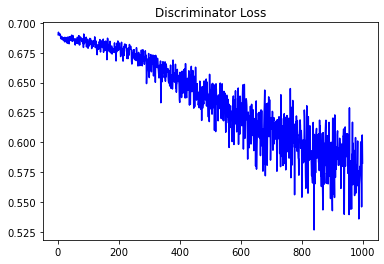

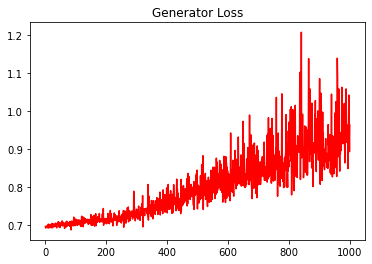

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5397588319666684


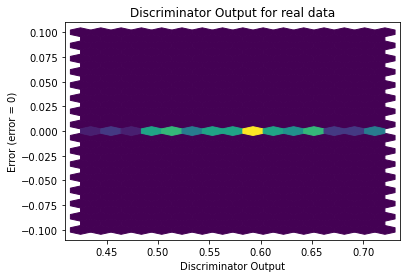

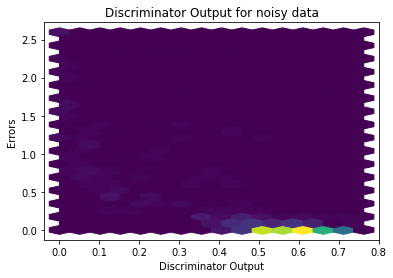

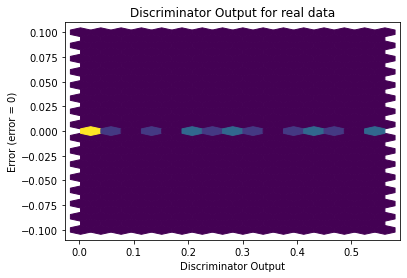

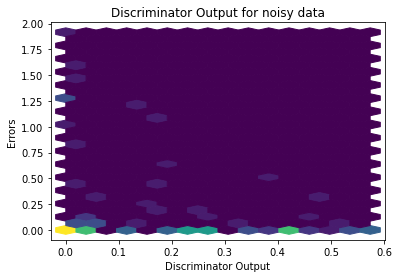

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


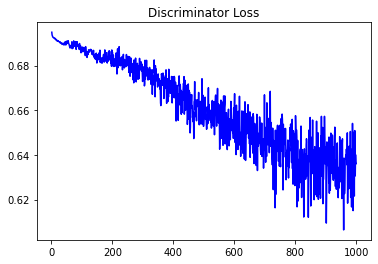

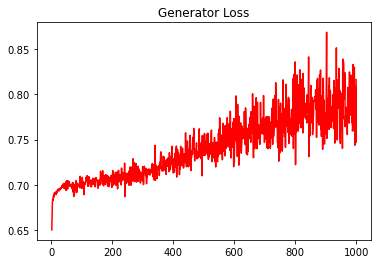

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5582639155387878


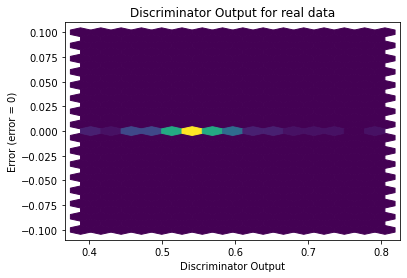

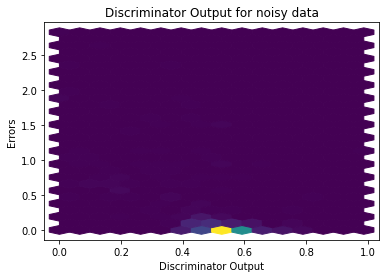

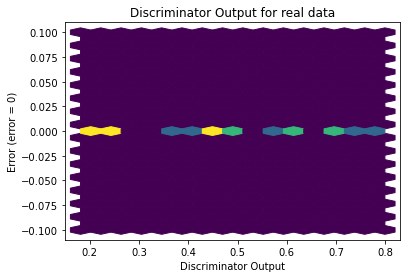

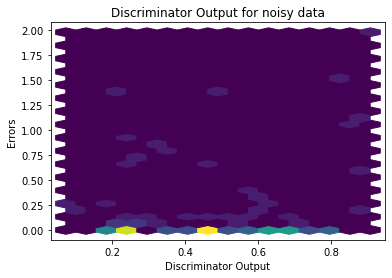

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1461]], requires_grad=True)
